In [5]:
import os
import json
import warnings
import numpy as np
import xarray as xr
import proplot as pplt
warnings.filterwarnings('ignore')
pplt.rc.update({'figure.dpi':100})

In [2]:
with open('/global/cfs/cdirs/m4334/sferrett/monsoon-discovery/scripts/configs.json','r',encoding='utf-8') as f:
    CONFIGS = json.load(f)
SPLITSDIR  = CONFIGS['filepaths']['splits']      
MODELDIR   = CONFIGS['filepaths']['models']    
PREDSDIR   = CONFIGS['filepaths']['predictions']  
MODELS     = CONFIGS['experiments']

In [3]:
def plot_ramp_fits(runs=MODELS['pod']['runs'],modeldir=MODELDIR):
    fig,axs = pplt.subplots(nrows=1,ncols=2,refwidth=3,refheight=2,share=True)
    axs.format(xlabel='$\mathit{B_L}$ (ms$^2$)',xlim=(-0.2,0.1),ylabel='Precipitation Rate (mm/hr)')
    for i,(name,run) in enumerate(runs.items()):
        data   = np.load(os.path.join(modeldir,'pod',f'{name}.npz'))
        xbins  = data['bincenters']
        withlf = bool(data['withlf'][0])
        if not withlf:
            ymeans,fitrange = data['ymean'],data['fitrange']
            alpha,blcrit    = float(data['alpha']),float(data['blcrit'])
            axs[i].scatter(xbins[~fitrange],ymeans[~fitrange],color='gray',marker='.',alpha=0.1)
            axs[i].scatter(xbins[fitrange],ymeans[fitrange],color='gray',marker='.',alpha=0.7)
            axs[i].plot(xbins,alpha*np.maximum(0,xbins-blcrit),color='dark gray',linewidth=2,label=f'Ramp Fit ($\\alpha$ = {alpha:.1f})')
            axs[i].axvline(blcrit,color='gray',alpha=0.5,linestyle='--',label=fr'$\mathit{{B_c}}$ = {blcrit:.3f}')
        else:
            ymeansland,fitrangeland   = data['ymeanland'],data['fitrangeland']
            alphaland,blcritland      = float(data['alphaland']),float(data['blcritland'])
            ymeansocean,fitrangeocean = data['ymeanocean'],data['fitrangeocean']
            alphaocean,blcritocean    = float(data['alphaocean']),float(data['blcritocean'])
            axs[i].scatter(xbins[~fitrangeland],ymeansland[~fitrangeland],color='jungle green',marker='.',alpha=0.1)
            axs[i].scatter(xbins[fitrangeland],ymeansland[fitrangeland],color='jungle green',marker='.',alpha=0.7)
            axs[i].plot(xbins,alphaland*np.maximum(0,xbins-blcritland),color='spruce',linewidth=2,label=f'Land Ramp Fit ($\\alpha$ = {alphaland:.1f})')
            axs[i].axvline(blcritland,color='jungle green',alpha=0.5,linestyle='--',label=fr'Land $\mathit{{B_c}}$ = {blcritland:.3f}')
            axs[i].scatter(xbins[~fitrangeocean],ymeansocean[~fitrangeocean],color='blue3',marker='.',alpha=0.1)
            axs[i].scatter(xbins[fitrangeocean],ymeansocean[fitrangeocean],color='blue3',marker='.',alpha=0.7)
            axs[i].plot(xbins,alphaocean*np.maximum(0,xbins-blcritocean),color='blue9',linewidth=2,label=f'Ocean Ramp Fit ($\\alpha$ = {alphaocean:.1f})')
            axs[i].axvline(blcritocean,color='blue3',alpha=0.5,linestyle='--',label=fr'Ocean $\mathit{{B_c}}$ = {blcritocean:.3f}')
        axs[i].format(title=name)
    axs.legend(loc='ul',ncols=1)
    pplt.show()

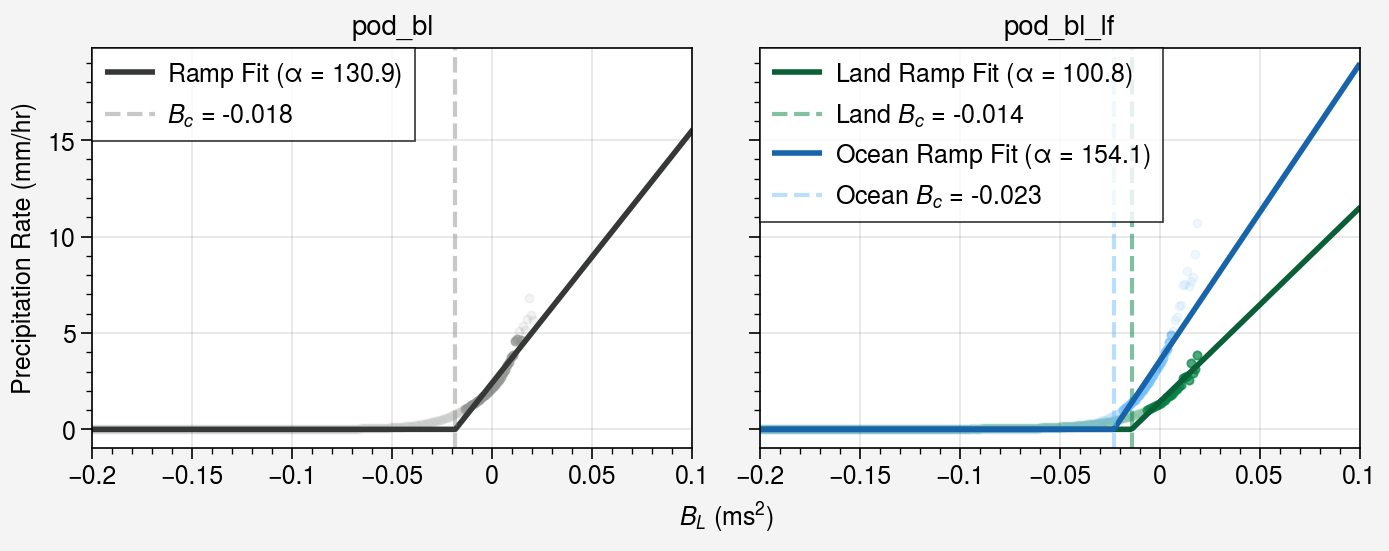

In [4]:
plot_ramp_fits()